![](files/Fasshauer.png)

In [1]:
using SpecialFunctions, Laplacians, KernelMatrices, Plots

function dist(x, z, d = 2)
    return (sum((x .- z).^d))^(1/d)
end

function matkern(dis::Number, epsilon::Number, m::Number, d::Int = 2)
    return besselk(m-d/2, epsilon*dis)*(epsilon*dis)^(m-d/2)
end

┌ Info: Precompiling KernelMatrices [b172bcd2-82ed-11e9-108e-f9294c34b9e6]
└ @ Base loading.jl:1278


matkern (generic function with 2 methods)

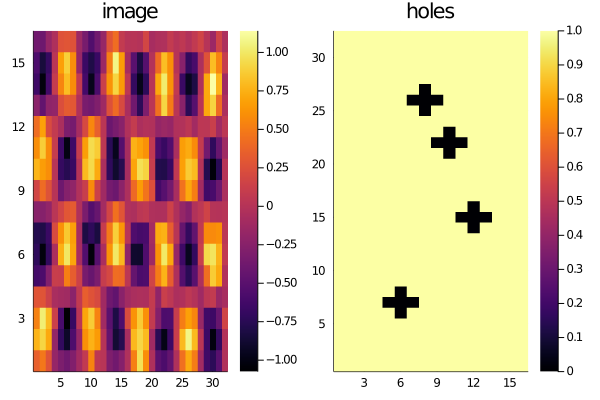

In [2]:
L = 32
K = 16
a_num = (L,K) # length vectors for a 2D problem
x1 = 1:a_num[1]
x2 = 1:a_num[2]
d = length(a_num)
img = sin.(2*pi*x1/16)*sin.(2*pi*x2'/8) + randn(a_num)*0.1


cent = [(7,6), (15,12), (22,10), (26, 8)]
rad = 1.0

function prod_dot(m)
    mas = m[1]
    for i = 2:length(m)
        mas .*= m[i]
    end
    return mas
end

mask = map(c->broadcast(+, (x1 .- c[1]).^2, (x2 .- c[2])'.^2) .> rad^2, cent)
mask = prod_dot(mask)

p1 = heatmap(x1,x2,img, title = "image")
p2 = heatmap(mask, title = "holes")

plot(p1,p2,layout=(1,2))

In [7]:
xx = [[x,y] for x in x1 for y in x2]
xxyy = [(x,y) for x in xx for y in xx]
dis = reshape(map(x -> dist(x...), xxyy), (512, 512))

epsilon = 0.22
m = 2
M = matkern.(dis, epsilon, m)
#=
keep = collect(1:prod(size(mat)))

fun(c, k) = filter(x -> (floor(x/size(mat,1)) .- c[1]).^2 + (x%size(mat,1) .- c[2])'.^2 > rad^2, k)

keep = fun(cent[1], keep)
keep = fun(cent[2], keep)
keep = fun(cent[3], keep)

prod(size(mask)) - sum(mask[keep]), 2*20^2*pi;
print(size(keep))
mis =  
=#

512×512 Array{Float64,2}:
 NaN             0.94803       0.855735    …    0.00202131    0.00185185
   0.94803     NaN             0.94803          0.00219504    0.00202131
   0.855735      0.94803     NaN                0.00237115    0.00219504
   0.753746      0.855735      0.94803          0.00254748    0.00237115
   0.653673      0.753746      0.855735         0.00272161    0.00254748
   0.560736      0.653673      0.753746    …    0.00289093    0.00272161
   0.477119      0.560736      0.653673         0.00305268    0.00289093
   0.403415      0.477119      0.560736         0.00320403    0.00305268
   0.339376      0.403415      0.477119         0.00334216    0.00320403
   0.284321      0.339376      0.403415         0.00346438    0.00334216
   0.237373      0.284321      0.339376    …    0.0035682     0.00346438
   0.197595      0.237373      0.284321         0.00365141    0.0035682
   0.164068      0.197595      0.237373         0.00371222    0.00365141
   ⋮                      

In [8]:
a = Laplacians.grid2(reverse(a_num)...)

512×512 SparseArrays.SparseMatrixCSC{Float64,Int64} with 1952 stored entries:
  [2  ,   1]  =  1.0
  [33 ,   1]  =  1.0
  [1  ,   2]  =  1.0
  [3  ,   2]  =  1.0
  [34 ,   2]  =  1.0
  [2  ,   3]  =  1.0
  [4  ,   3]  =  1.0
  [35 ,   3]  =  1.0
  [3  ,   4]  =  1.0
  [5  ,   4]  =  1.0
  [36 ,   4]  =  1.0
  [4  ,   5]  =  1.0
  ⋮
  [507, 508]  =  1.0
  [509, 508]  =  1.0
  [477, 509]  =  1.0
  [508, 509]  =  1.0
  [510, 509]  =  1.0
  [478, 510]  =  1.0
  [509, 510]  =  1.0
  [511, 510]  =  1.0
  [479, 511]  =  1.0
  [510, 511]  =  1.0
  [512, 511]  =  1.0
  [480, 512]  =  1.0
  [511, 512]  =  1.0

In [10]:
parms = [ 1.0, 2.0, .3]

KernelMatrices.mtn_kernfun(xx[1], xx[2], parms)

0.498347326364248